This file can be downloaded from github:

# Report Structure

1. Objectives and Dataset introduction.
2. Exploratory and Descriptive Analysis
3. Data Cleaning and Preparation.
4. Predictive Models.
5. Model Comparison.
6. Model Fine Tune.
7. Conclusion

# 1. Objectives and Dataset introduction

## Project Aim
This report aims to build supervised classification models that can classify the risk of developing heart disease given different factors.

## Objectives
Given patients' background and personal information, my objective is to find the model that can correctly identify those with the risk of developing heart disease. 

## How will my solution be used?
This can be used by clinic and hospitals to quickly identify the patience with the risk of heart disease individually. This can also be used by hospitals, government and NGOs to make macro-level decisions, such as support for patients, budget allocation, and design policies to prevent and reduce the chances of getting a heart disease.


## Dataset introduction -- Framingham Heart Study
This dataset is from the study conducted by Framingham Heart Study and is available on kaggle: https://www.kaggle.com/amanajmera1/framingham-heart-study-dataset/notebooks The dataset provides patients' information on their habits and personal background, and whether they have developed heart disease. The sample size is 4,240 with 16 following variables:
 - TenYearCHD (target predict variable): risk in 10 years of developing heart disease CHD. 0 = no; 1 = yes.
 - male: 0 = female; 1 = male.
 - age: Continuous variable in integer.
 - education: 1 = Some High School; 2 = High School or GED; 3 = Some College or Vocational School; 4 = college
 - currentSmoker: 0 = nonsmoker; 1 = smoker
 - cigsPerDay: number of cigarettes smoked per day (estimated average). Continuous variable in integer.
 - BPMeds: 0 = Not on Blood Pressure medications; 1 = Is on Blood Pressure medications.
 - prevalentStroke: whether the patient had a stroke previously. 0 = no; 1 = yes.
 - prevalentHyp: whether the patient was hypertensive （high blood pressure). 0 = no; 1 = yes.
 - Diabetes: 0 = no; 1 = yes.
 - totChol: total cholesterol level. Continuous variable.
 - sysBP: systolic blood pressure. Continuous variable.
 - diaBP: diastolic blood pressure. Continuous variable.
 - BMI: Body Mass Index. Continuous variable in integer.
 - heartRate: Continuous variable in integer.
 - glucose: glucose level. Continuous variable.


## Import file and modules

In [1]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator

original_df=pd.read_csv('Heart-disease framingham.csv',encoding='utf-8')

In [2]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TenYearCHD       4240 non-null   int64  
 1   male             4240 non-null   int64  
 2   age              4240 non-null   int64  
 3   education        4135 non-null   float64
 4   currentSmoker    4240 non-null   int64  
 5   cigsPerDay       4211 non-null   float64
 6   BPMeds           4187 non-null   float64
 7   prevalentStroke  4240 non-null   int64  
 8   prevalentHyp     4240 non-null   int64  
 9   diabetes         4240 non-null   int64  
 10  totChol          4190 non-null   float64
 11  sysBP            4240 non-null   float64
 12  diaBP            4240 non-null   float64
 13  BMI              4221 non-null   float64
 14  heartRate        4239 non-null   float64
 15  glucose          3852 non-null   float64
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


# 2. Exploratory and Descriptive Analysis

In the later data cleaning step, I will remove rows with missing values, and this would also remove many values from other variables. So data description and visulisation is done before cleaning the data to show the distribution of variables, detect outliers, and to explore the relationship between interested variables and TenYearCHD.

## Continous variables

In [3]:
original_df[['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose'
                ]].describe().round(decimals=4).T 
#round and transpose the df for convenience 

,count,mean,std,min,25%,50%,75%,max
age,4240.0,49.5802,8.5729,32.00,42.00,49.0,56.00,70.0
cigsPerDay,4211.0,9.0059,11.9225,0.00,0.00,0.0,20.00,70.0
totChol,4190.0,236.6995,44.5913,107.00,206.00,234.0,263.00,696.0
sysBP,4240.0,132.3546,22.0333,83.50,117.00,128.0,144.00,295.0
diaBP,4240.0,82.8978,11.9104,48.00,75.00,82.0,90.00,142.5
BMI,4221.0,25.8008,4.0798,15.54,23.07,25.4,28.04,56.8
heartRate,4239.0,75.8790,12.0253,44.00,68.00,75.0,83.00,143.0
glucose,3852.0,81.9637,23.9543,40.00,71.00,78.0,87.00,394.0


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'cigsPerDay'}>,
        <AxesSubplot:title={'center':'totChol'}>],
       [<AxesSubplot:title={'center':'sysBP'}>,
        <AxesSubplot:title={'center':'diaBP'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'heartRate'}>,
        <AxesSubplot:title={'center':'glucose'}>, <AxesSubplot:>]],
      dtype=object)

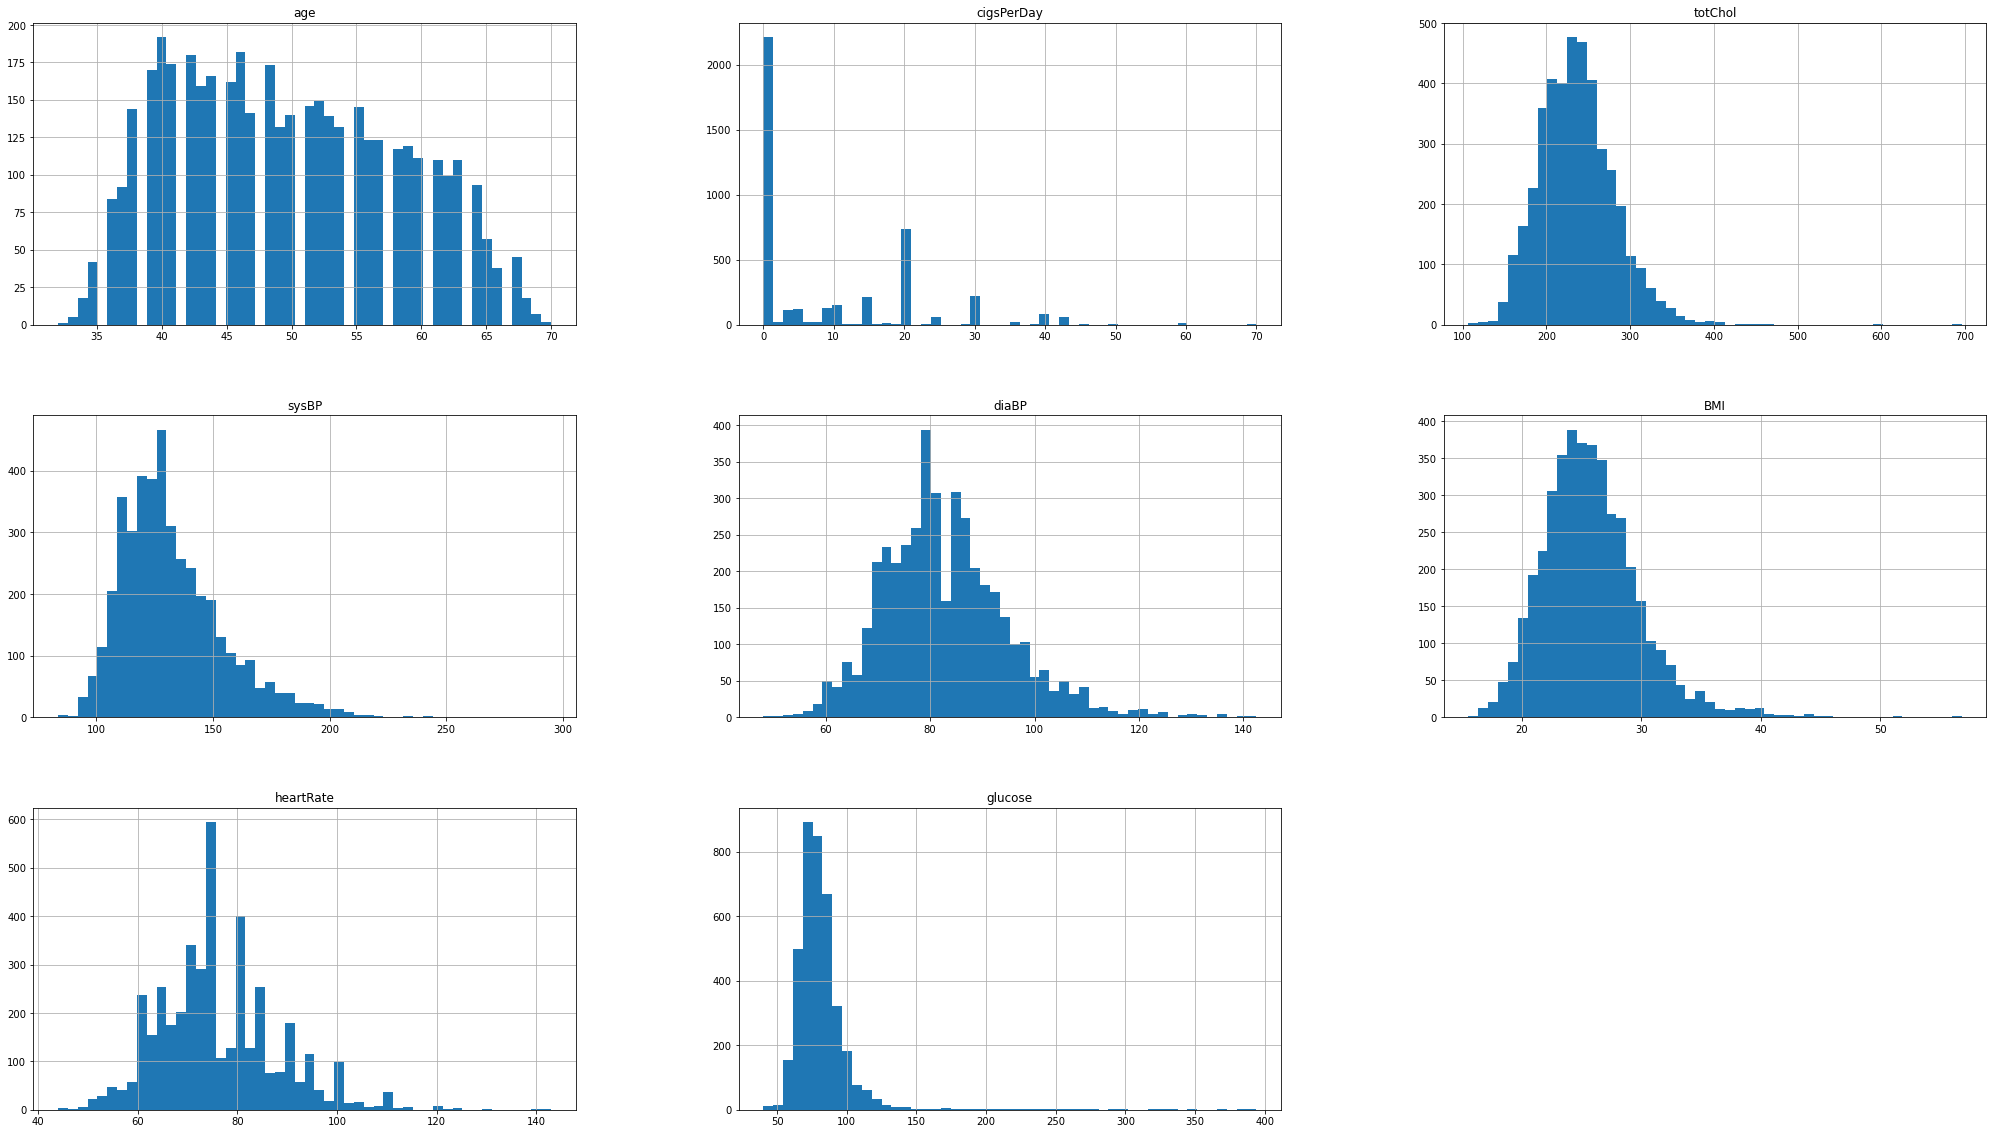

In [4]:
%matplotlib inline
original_df.hist(column=['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose'
                ],figsize=(35,20),bins=50)
#save_fig("attribute_histogram_plots")
plt.show()

As the diagrams show, most continuous variables are normally distributed, with different range. There are some outliers in most of them, including totChol, sys BP, diaBP and glucose. Most people's BMI is around 20-35, meaning that most people in the sample are either nearly overweight or being overweight. The age range of the sample is wide, varies from 30 to 70.

CigsPerDay is not normally distributed, as most people in the sample don’t smoke at all, however there is one outlier who smoke 70 cigarettes per day.

## Categorical Variables

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

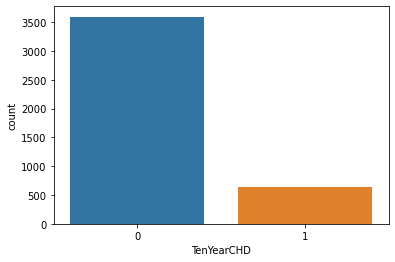

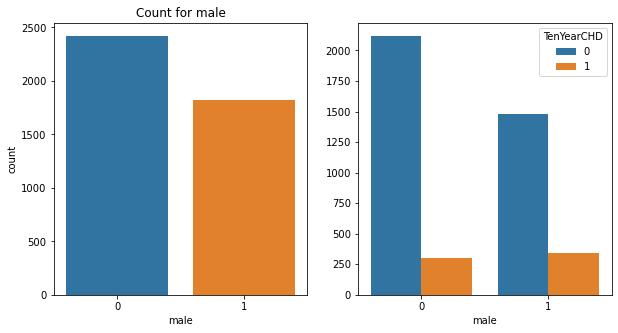

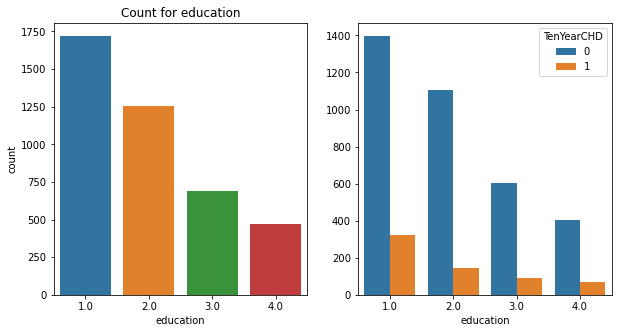

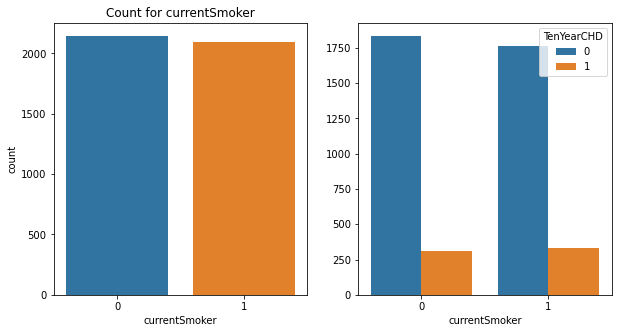

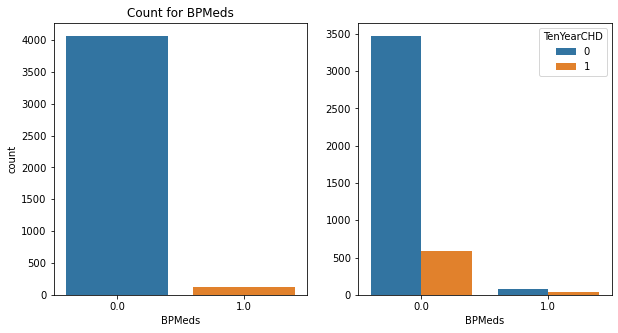

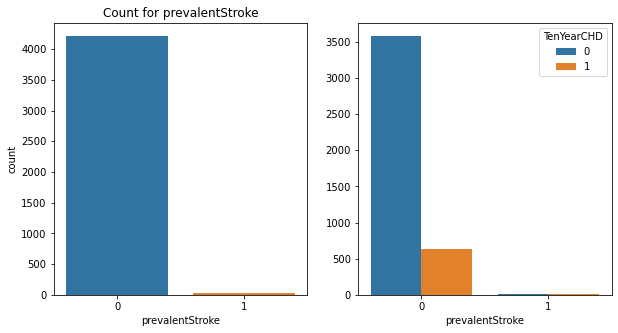

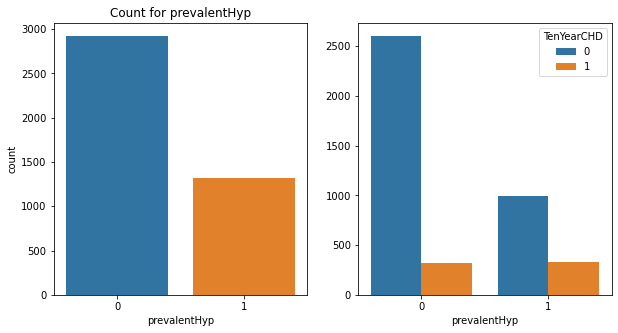

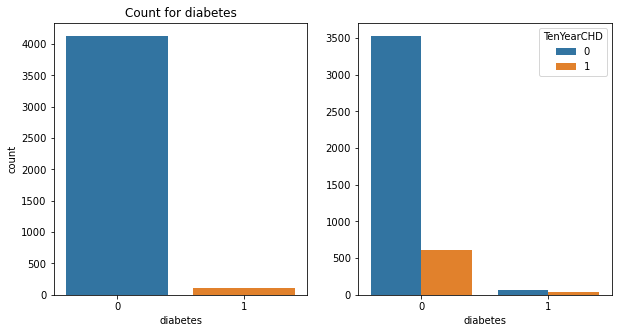

In [5]:
# count the target variable first
sns.countplot(data = original_df, x = "TenYearCHD")
categorical_variabels=['male','education','currentSmoker','BPMeds','prevalentStroke',
                      'prevalentHyp','diabetes']
# define a function that get the count of categorical variables 
def categorical_count_plot(variable,data):
    plt.figure(figsize= (10,5))

    plt.subplot(1,2,1)
    sns.countplot(x=original_df[variable]).set_title("Count for " + variable)
    
    plt.subplot(1,2,2)
    sns.countplot(x=original_df[variable], hue= data['TenYearCHD'])
    plt.ylabel("")
    
    plt.show();

for variable in categorical_variabels:
    categorical_count_plot(variable,original_df)

From the first diagram counting the distribution of target variable (TenYearCHD), it is clear that this dataset is highly imbalanced, with far more sample without the risk of heart disease than people with the risk. This severely skewed class distribution is difficult for building the classification model can cause poor performance as most of the prediction would be the majority classification. This problem would be further addressed in data preparation section.


From the left sub-plot, we can see there are more women in the dataset, however, after adding the count of TenYearCHD for each gender, there are more men are at the risk of heart disease.


The distribution of education and the number of people in each education having heart disease are the same. The less education received, the higher the risk. However, we cannot simply draw the causation from the graph, because education level may be connected with family income which can also affect the chance of having heart disease.  


The number of current smoker and non-smoker are balanced, with current smoker has a slightly higher risk.


The distribution for prevalentHyp, BPMeds, and diabetes are not balanced, especially the former two.

## Correlation Matrix

<Figure size 1008x1008 with 0 Axes>

<AxesSubplot:>

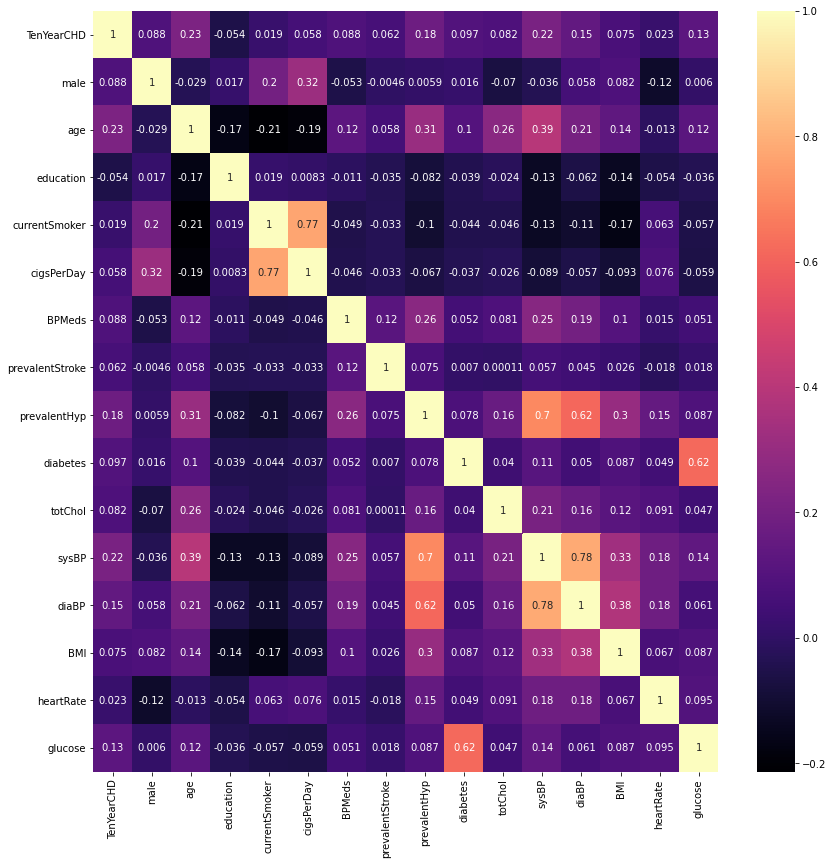

In [6]:
plt.figure(figsize = (14,14))
sns.heatmap(original_df.corr(), annot = True, cmap = "magma")

Most variables do not have high correlation with each other. currentSmoker and cigsPerDay have correlation of 0.77, which is expected; prevalentHyp has correlation of 0.7 and 0.62 with sysBP and diaBP respectively, which is also expected since they are all related with blood pressure, while the correlation between sysBP diaBP is 0.78.

# 3. Data Cleaning and Preparation

## Drop Missing Value

In [7]:
original_df.isnull().sum()

TenYearCHD           0
male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
dtype: int64

In [8]:
cleaned_df=original_df.dropna()
cleaned_df.isnull().sum()

TenYearCHD         0
male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
dtype: int64

## Scaling and Splitting
As mentioned above, the scale of each numerical variablesare different, also this dataset contains outlier, so I choose to use MinMax scaler (also called Normalization) to scale my data.

In [9]:
# create scaler
mm_scaler=MinMaxScaler()
final_df=pd.DataFrame(mm_scaler.fit_transform(cleaned_df),columns = cleaned_df.columns)
final_df

,TenYearCHD,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,0.0,1.0,0.184211,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.168378,0.106383,0.232804,0.277024,0.363636,0.104520
1,0.0,0.0,0.368421,0.333333,0.0,0.000000,0.0,0.0,0.0,0.0,0.281314,0.177305,0.349206,0.319680,0.515152,0.101695
2,0.0,1.0,0.421053,0.000000,1.0,0.285714,0.0,0.0,0.0,0.0,0.271047,0.208038,0.338624,0.237518,0.313131,0.084746
3,1.0,0.0,0.763158,0.666667,1.0,0.428571,0.0,0.0,1.0,0.0,0.229979,0.314421,0.497354,0.316045,0.212121,0.177966
4,0.0,0.0,0.368421,0.666667,1.0,0.328571,0.0,0.0,0.0,0.0,0.353183,0.219858,0.380952,0.183228,0.414141,0.127119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3653,1.0,1.0,0.473684,0.000000,1.0,0.014286,0.0,0.0,1.0,0.0,0.410678,0.451537,0.465608,0.252787,0.222222,0.129944
3654,0.0,1.0,0.500000,0.666667,1.0,0.614286,0.0,0.0,0.0,0.0,0.193018,0.203310,0.338624,0.101066,0.212121,0.079096
3655,0.0,0.0,0.526316,0.333333,0.0,0.000000,0.0,0.0,0.0,0.0,0.320329,0.236407,0.370370,0.143723,0.363636,0.189266
3656,0.0,1.0,0.210526,0.666667,0.0,0.000000,0.0,0.0,1.0,0.0,0.147844,0.271868,0.529101,0.243820,0.232323,0.090395


Range of the variables, mean, std are all normalised. Now split the dataset into train set and test set.

In [10]:
# split the data
X = final_df.drop(['TenYearCHD'], axis=1)
y = final_df['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

## Oversample

As shown in data visulisation section, there are far more people without the risk of heart disease than those with the risk.

The effect is shown during my first modelling process, the accuracy scores of logistic regression and KNN are around 0.9, but the F1 scores is 0.09 for logistic regression and 0.01 for KNN, as most of the prediction is class 0

So I use SMOTE (Synthetic Minority Oversampling Technique) as solution to solve this problem by oversampling the minority class. This approach involves duplicating examples in the minority class, without adding any new information to the model. **This is applied to training dataset only, with test set remains the same.**

In [11]:
smote = SMOTE()
X_train,y_train = smote.fit_resample(X_train,y_train)

As the counter shows, the number of 1 and 0 is now balanced.

# 4. Predictive Models

Predictive models
I use the following 5 supervised models to build my prediction:
1. Logistic Regression.

2. KNN (K Nearest Neighbour)

3. Decision Tree

4. Random Forest

5. Support Vector Machine 

The metrics to be used to determine the best models are:

1. Cross Validation Score Average: Cross-validation is a resampling procedure used to evaluate models on a limited data sample. In this case, the training dataset is resampled and randomly split the dataset, with one group is treated as sub-test dataset while the remaining groups are the training data set. This procedure is done for each unique group, and the average score is recorded.


2. Classification Accuracy: Accuracy Score = Number of Correct Prediction / Number of all prediction.


3. Confusion Matrix: 
 - True Positive (TP): Predicting positive class as Positive. [Desired]
 - False Positive (FP): Predicting negative class as Positive. [Not Desired]
 - True Negative (FN): Predicting negative class as Negative. [Desired]
 - False Negative: Predicting positive class as Negative. [Not Desired.]
 
 
4. Recall / Sensitivity: It measures how god the model is at correctly predicting the **actual positive** classes. Recall = TP/ (TP+TN).  


5. Precision: It measures how good the model is when the **prediction is positive.**  Precision = TP / (TP + FP)


6. F1 Score: This is the weighted average of precision and recall, so this takes both false positive and false negatives into account. F1_score = 2 * (Precision * Recall) / (Precision + Recall).


7. ROC curve (receiver operating characteristic curve): This summarises the performance of the model at different threshold values by combining confusion matrices.  X axis is true positive rate (sensitivity) and y axis is the false positive rate (1 – specificity)


8. AUC (Area Under the ROC Curve): this is the area underneath the ROC curve.


In the model building section, only confusion matrix for each model will be presented to give an insight of the model performance. The scores and curves will be presented in the next section – Model Comparison. The usefulness of each matrix under contextual background will also be discussed in the next section.




In [12]:
# define a function to quickly draw confusion matrix for each model
def plot_confusion_matrix (predict_value):
    data=confusion_matrix(y_test, predict_value)
    matrix = pd.DataFrame(data=data,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
    plt.figure(figsize = (9,8))
    sns.heatmap(matrix, annot = True, cmap = "magma", fmt = "g")

## 4.1 Logistic Regression

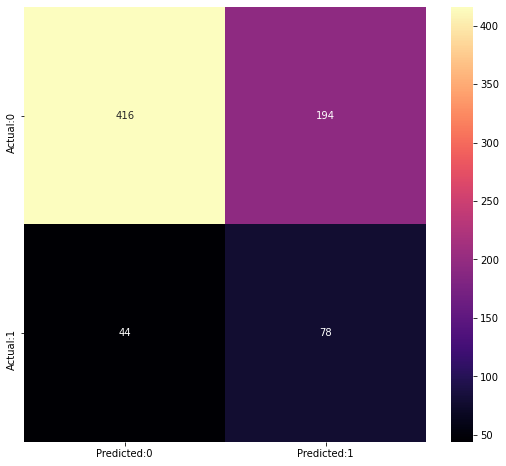

In [13]:
lr_model = LogisticRegression(random_state=42).fit(X_train,y_train)
#cv score for train set
lr_cv_score = cross_val_score(lr_model, X_train, y_train, cv=5, scoring="accuracy").mean()

# get the predicted y_test value
lr_predict = lr_model.predict(X_test)
# accuracy score
lr_accuracy = accuracy_score(y_test, lr_predict)
# f1 score
lr_f1 = f1_score(y_test, lr_predict)
# recall/sensitivity
lr_recall = recall_score(y_test, lr_predict)
# precision
lr_precision = precision_score(y_test, lr_predict)
# auc
lr_auc = roc_auc_score(y_test, lr_predict)

plot_confusion_matrix(lr_predict)

## 4.2 KNN (K Nearest Neighbour)

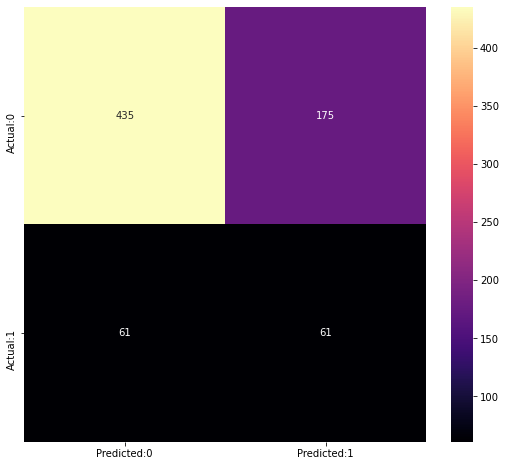

In [14]:
knn_model = KNeighborsClassifier(n_neighbors = 10).fit(X_train, y_train)
knn_cv_score = cross_val_score(knn_model, X_train, y_train, cv=5, scoring="accuracy").mean()

knn_predict = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predict)
knn_f1 = f1_score(y_test, knn_predict)
knn_recall = recall_score(y_test, knn_predict)
knn_precision = precision_score(y_test, knn_predict)
knn_auc = roc_auc_score(y_test, knn_predict)

plot_confusion_matrix(knn_predict)

## 4.3 Decision Tree

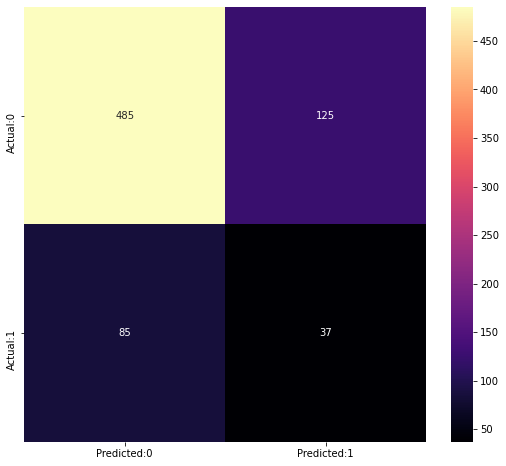

In [15]:
dt_model = DecisionTreeClassifier(random_state = 42).fit(X_train, y_train)
dt_cv_score = cross_val_score(dt_model, X_train, y_train, cv=5, scoring="accuracy").mean()

dt_predict = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predict)
dt_f1 = f1_score(y_test, dt_predict)
dt_recall = recall_score(y_test, dt_predict)
dt_precision = precision_score(y_test, dt_predict)
dt_auc = roc_auc_score(y_test, dt_predict)

plot_confusion_matrix(dt_predict)

## 4.4 Random Forest

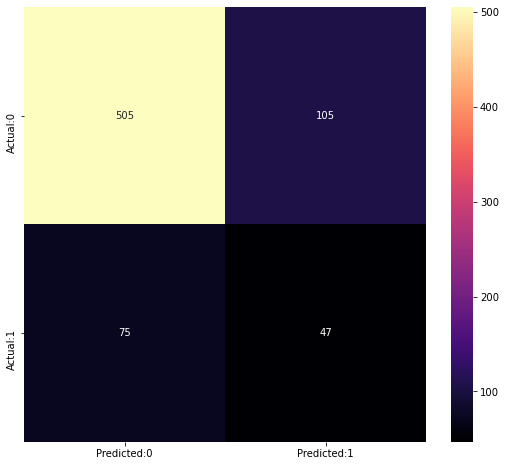

In [16]:
rf_model = RandomForestClassifier(n_estimators=200, random_state = 42,max_depth=12).fit(X_train, y_train)
rf_cv_score = cross_val_score(rf_model, X_train, y_train, cv=5, scoring="accuracy").mean()

rf_predict = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predict)
rf_f1 = f1_score(y_test, rf_predict)
rf_recall = recall_score(y_test, rf_predict)
rf_precision = precision_score(y_test, rf_predict)
rf_auc = roc_auc_score(y_test, rf_predict)

plot_confusion_matrix(rf_predict)

## 4.5 SVM (Supprt Vector Machine)

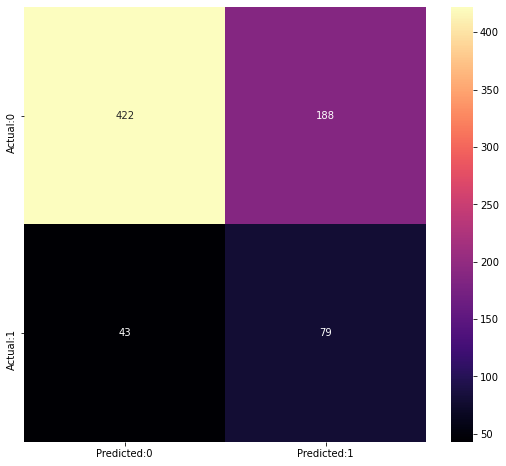

In [17]:
svm_model = SVC().fit(X_train, y_train)
svm_cv_score = cross_val_score(svm_model, X_train, y_train, cv=5, scoring="accuracy").mean()

svm_predict = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predict)
svm_f1 = f1_score(y_test, svm_predict)
svm_recall = recall_score(y_test, svm_predict)
svm_precision = precision_score(y_test, svm_predict)
svm_auc = roc_auc_score(y_test, svm_predict)

plot_confusion_matrix(svm_predict)

# 5. Model Comparision

## Scores

In [18]:
Scores = {"Model:":["Logistic Regression","KNN","Decision Tree","Random Forest","SVM"]
                   ,"CV Score:":[lr_cv_score,knn_cv_score,dt_cv_score,rf_cv_score,svm_cv_score]
                   ,"Accuracy Socre":[lr_accuracy,knn_accuracy,dt_accuracy,rf_accuracy,svm_accuracy]
                   ,"F1 Score":[lr_f1,knn_f1,dt_f1,rf_f1,svm_f1]
                   ,"Recall":[lr_recall, knn_recall, dt_recall, rf_recall,svm_recall]
                   ,"Precision":[lr_precision, knn_precision, dt_precision, rf_precision,svm_precision]
                   ,"AUC":[lr_auc,knn_auc,dt_auc,rf_auc,svm_auc]}

Comparison_table = pd.DataFrame(Scores)
Comparison_table

,Model:,CV Score:,Accuracy Socre,F1 Score,Recall,Precision,AUC
0,Logistic Regression,0.671220,0.674863,0.395939,0.639344,0.286765,0.660656
1,KNN,0.785630,0.677596,0.340782,0.500000,0.258475,0.606557
2,Decision Tree,0.774997,0.713115,0.260563,0.303279,0.228395,0.549180
3,Random Forest,0.859502,0.754098,0.343066,0.385246,0.309211,0.606557
4,SVM,0.696111,0.684426,0.406170,0.647541,0.295880,0.669672


As the tables shows, the best model according to different metrics are different. Random Forest model has the higher CV Score and Accuracy score; however, its recall and precision are lower than Logistic Regression and SMV, while these two have lower accuracy.

Accuracy represents how good a model is in predicting **all classes**, but in some cases this is not enough, because it tells nothing about the accuracy for **each class**. The confusion matrix in last section shows that most of the prediction is 0, this result can indeed lead to a high accuracy score because most y value in the test set is 0, but if we look at the class 1, the prediction is poor and unacceptable. Thus, we should not use mainly accuracy score to choose the best model, as the distribution of real-world situation is not always the same as this test set.

## ROC Curves

<Figure size 720x576 with 0 Axes>

(0.0, 1.0, 0.0, 1.0)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

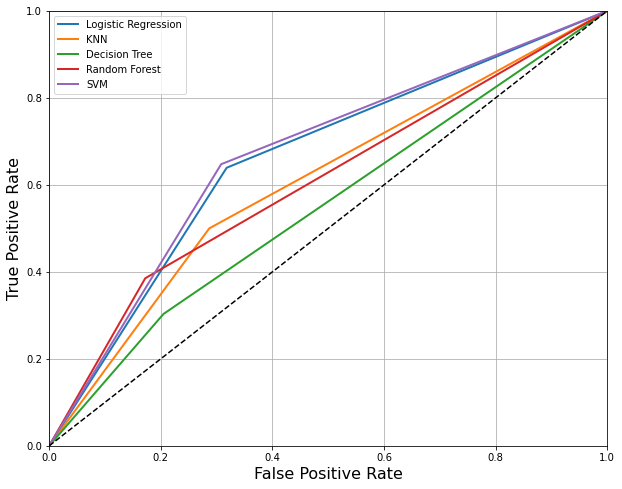

In [19]:
lr_fpr, lr_tpr, thresholds = roc_curve(y_test, lr_predict)
knn_fpr, knn_tpr, thresholds = roc_curve(y_test, knn_predict)
dt_fpr, dt_tpr, thresholds = roc_curve(y_test, dt_predict)
rf_fpr, rf_tpr, thresholds = roc_curve(y_test, rf_predict)
svm_fpr, svm_tpr, thresholds = roc_curve(y_test, svm_predict)

plt.figure(figsize=(10, 8))
plt.plot(lr_fpr, lr_tpr, linewidth=2, label="Logistic Regression")
plt.plot(knn_fpr, knn_tpr, linewidth=2, label="KNN")
plt.plot(dt_fpr, dt_tpr, linewidth=2, label="Decision Tree")
plt.plot(rf_fpr, rf_tpr, linewidth=2, label="Random Forest")
plt.plot(svm_fpr, svm_tpr, linewidth=2, label="SVM")
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.legend()
plt.grid(True)

According to ROC curves, Logistic Regression and SVM clearly perfomed better than the others. I choose Logistic Regression and SVM have its parameters tuned for better performance.

# 6. Model Fine Tune

I use GridSearchCV to perform fine tune and test each hyperparameter. The parameter “scoring” is default as F1 score, i.e. the strategy to evaluate the performance of the cross-validated model on the test set would be F1, because this is a more comprehensive score that takes both false positive and false negatives into account. 


However, contextual background has to be considered, in the case of detecting heart disease (which is 1), avoiding false negative is more important than avoiding false positive, because it is less severe for one healthy patient to be mistakenly diagnosed as heart disease, than one patient who has the risk of heart disease to be diagnosed as no risk. Put it into numerical terms, I want all y = 1 to be classified as 1. 


Thus, recall/sensitivity is the most important evaluation matrix in this case, as it focuses on the accuracy of **actual positive** case, then scoring would be set as ‘recall’.

## 6.1 Logistic Regression

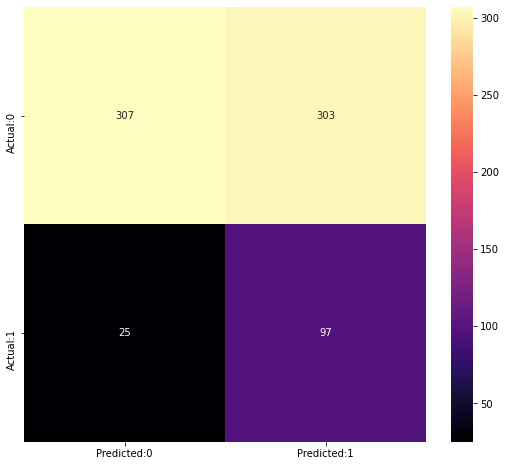

In [20]:
lr_grid = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
lr_clf = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid = lr_grid
                      ,scoring = 'recall', cv=20)
lr_tuned = lr_clf.fit(X_train, y_train)

lr_tuned_predict = lr_tuned.predict(X_test)
plot_confusion_matrix(lr_tuned_predict)

In [21]:
lr_tuned_accuracy = accuracy_score(y_test, lr_tuned_predict)
lr_tuned_f1 = f1_score(y_test, lr_tuned_predict)
lr_tuned_recall = recall_score(y_test, lr_tuned_predict)
lr_tuned_precision = precision_score(y_test, lr_tuned_predict)
lr_tuned_auc = roc_auc_score(y_test, lr_tuned_predict)

In [23]:
BaseEstimator.get_params(lr_clf)['estimator__C']
BaseEstimator.get_params(lr_clf)['estimator__penalty']

1.0

'l2'

## 6.2 SVM

In [24]:
%%capture
#hide the lenthy output
svm_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
svm_clf = GridSearchCV(SVC(), svm_grid, refit = True, verbose = 3,scoring = 'recall') 
  
# fitting the model for grid search 
svm_tuned = svm_clf.fit(X_train, y_train) 

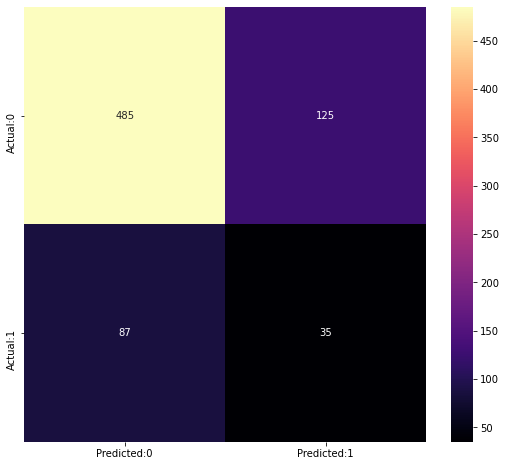

In [25]:
svm_tuned_predict = svm_tuned.predict(X_test)
plot_confusion_matrix(svm_tuned_predict)

svm_tuned_accuracy = accuracy_score(y_test, svm_tuned_predict)
svm_tuned_f1 = f1_score(y_test, svm_tuned_predict)
svm_tuned_recall = recall_score(y_test, svm_tuned_predict)
svm_tuned_precision = precision_score(y_test, svm_tuned_predict)
svm_tuned_auc = roc_auc_score(y_test, svm_tuned_predict)

In [26]:
# get the hyperparameters for the best svm model
BaseEstimator.get_params(svm_clf)

{'cv': None,
 'error_score': nan,
 'estimator__C': 1.0,
 'estimator__break_ties': False,
 'estimator__cache_size': 200,
 'estimator__class_weight': None,
 'estimator__coef0': 0.0,
 'estimator__decision_function_shape': 'ovr',
 'estimator__degree': 3,
 'estimator__gamma': 'scale',
 'estimator__kernel': 'rbf',
 'estimator__max_iter': -1,
 'estimator__probability': False,
 'estimator__random_state': None,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'estimator': SVC(),
 'n_jobs': None,
 'param_grid': {'C': [0.1, 1, 10, 100, 1000],
  'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
  'kernel': ['rbf']},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': 'recall',
 'verbose': 3}

## 5.3 Tuned Result

In [31]:
Tuned_Scores = {"Model:":["Original LR","Logistic Regression","Original SVM","SVM"]
                   ,"Accuracy Socre":[lr_accuracy,lr_tuned_accuracy,svm_accuracy,svm_tuned_accuracy]
                   ,"F1 Score":[lr_f1,lr_tuned_f1,svm_f1,svm_tuned_f1]
                   ,"Recall":[lr_recall,lr_tuned_recall,svm_recall,svm_tuned_recall]
                   ,"Precision":[lr_precision, lr_tuned_precision, svm_precision, svm_tuned_precision]
                   ,"AUC":[lr_auc, lr_tuned_auc,svm_auc,svm_tuned_auc]}

Comparison = pd.DataFrame(Tuned_Scores)
Comparison

,Model:,Accuracy Socre,F1 Score,Recall,Precision,AUC
0,Original LR,0.674863,0.395939,0.639344,0.286765,0.660656
1,Logistic Regression,0.551913,0.371648,0.795082,0.242500,0.649180
2,Original SVM,0.684426,0.406170,0.647541,0.295880,0.669672
3,SVM,0.710383,0.248227,0.286885,0.218750,0.540984


After tuning the hyperparameter, the recall score for LR models goes up significantly, however the accuracy rate goes down, according to confusion matrix, this is due to that many y = 0 is classified as 1. As I mentioned above, this is less severe than most of y = 1 being classified as 0, however, the model would be better if this can be further improved. Precision score also decreases, this is due to the trade-off between recall and precision.

The recall score and F1 score of SVM model go down surprisingly, although the accuracy score goes up slightly. This is not as satisfied as LR.

<Figure size 720x576 with 0 Axes>

(0.0, 1.0, 0.0, 1.0)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

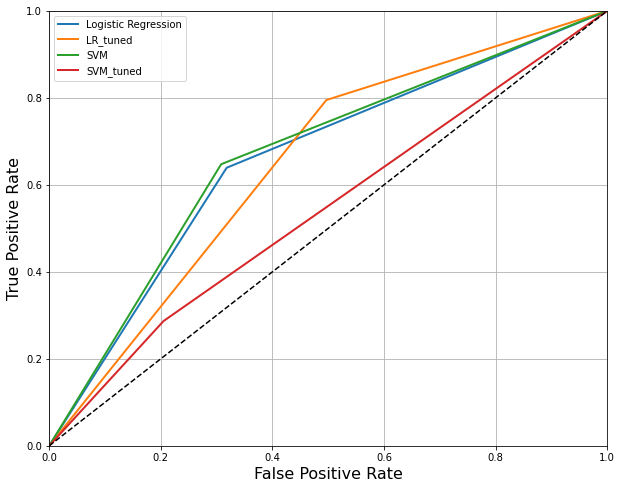

In [30]:
lr_fpr, lr_tpr, thresholds = roc_curve(y_test, lr_predict)
lr_tuned_fpr, lr_tuned_tpr, thresholds = roc_curve(y_test, lr_tuned_predict)
svm_fpr, svm_tpr, thresholds = roc_curve(y_test, svm_predict)
svm_tuned_fpr, svm_tuned_tpr, thresholds = roc_curve(y_test, svm_tuned_predict)

plt.figure(figsize=(10, 8))
plt.plot(lr_fpr, lr_tpr, linewidth=2, label="Logistic Regression")
plt.plot(lr_tuned_fpr, lr_tuned_tpr, linewidth=2, label="LR_tuned")
plt.plot(svm_fpr, svm_tpr, linewidth=2, label="SVM")
plt.plot(svm_tuned_fpr, svm_tuned_tpr, linewidth=2, label="SVM_tuned")
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.legend()
plt.grid(True)

# 6 Conclusion

1. Logistic Regression is the most effective model, especially considering the recall score.


2.  There is a trade-off between accuracy and recall. So if the risk of having heart disease of individual patience is to be predicted, then models with high recall score should be used. However, if a macro-level decision such as assigning the budget, or calculating the probability of having heart disease of a group, then models with high accuracy should be considered. 


3. Although oversampling reduces the impact of data imbalance, however add additional data on minority class (y = 0) will improve the accuracy of prediction also the accuracy of testing. 